<a href="https://colab.research.google.com/github/Adityajeegari/23CSBTB39-40/blob/main/AIML_Lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADITYA JEEGARI(2303A52113)

# PART 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Classified_Data.csv')
print(df.head())
print("\nData types:\n", df.dtypes)
summary = df.describe(percentiles=[.25, .5, .75, .90])
print("\nSummary statistics:\n", summary)
column_names = df.columns.tolist()
print("\nColumn names:", column_names)
features = df.iloc[:, :-1]
target = df.iloc[:, -1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\nScaled features:\n", scaled_df.head())

   Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0           0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1           1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2           2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3           3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4           4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   

        FDJ       PJF       HQE       NXJ  TARGET CLASS  
0  0.759697  0.643798  0.879422  1.231409             1  
1  0.675334  1.013546  0.621552  1.492702             0  
2  1.626351  1.154483  0.957877  1.285597             0  
3  1.409708  1.380003  1.522692  1.153093             1  
4  1.115596  0.646691  1.463812  1.419167             1  

Data types:
 Unnamed: 0        int64
WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ    

# PART 2

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Classified_Data.csv')
features = df.iloc[:, :-1]
target = df.iloc[:, -1]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
X_train, X_test, y_train, y_test = train_test_split(scaled_df, target, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN Classifier model has been fitted to the training data.")

KNN Classifier model has been fitted to the training data.


# PART 3

Confusion Matrix:
 [[92  6]
 [ 4 98]]


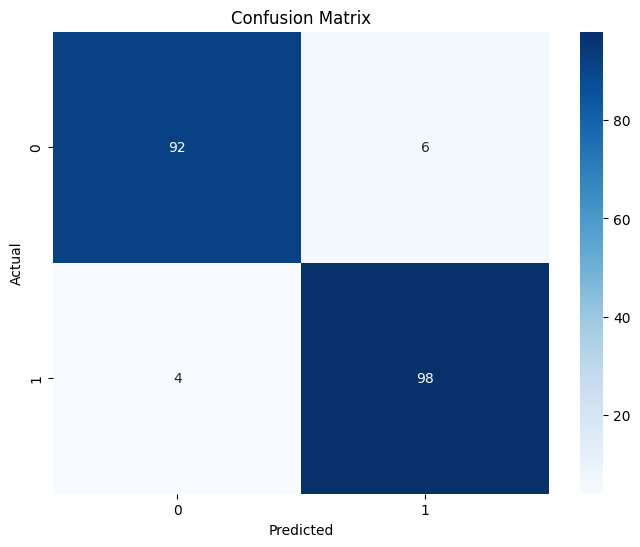

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       102

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)